In [1]:

from IPython.display import clear_output
import json
import os
import time

#reading all the files in the directory which names start with "answers"
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith("answers_")]
#reading each of the files contained in files
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        #iterating through each of the questions
        n_correct_answers = 0
        n_questions = 0
        for question in data['answers']:
            n_questions += 1
            print('-----------------------------------')
            print(f'Reading file: {file}')
            print('Correct answer: ' + question['right answer'])
            print('Answer: ' + question['answer'])
            correct = input('Is the answer correct? (y/n)')

            #if the answer is correct, then the value of the key "correct" is set to 1
            if correct.lower() == 'y' or correct.lower() == 'yes' or correct.lower() == 't' or correct.lower() == 'true':
                n_correct_answers += 1
                question['correct'] = True
                print('Correct answer!')
            #else the value of the key "correct" is set to 0
            else:
                question['correct'] = False
                print('Wrong answer!')
            print(f'Number of correct answers: {str(n_correct_answers)}/{str(n_questions)}')
            time.sleep(0)
            #clear_output(wait=True)
        #adding the number of correct answers to the dictionary
        data['n_correct_answers'] = n_correct_answers
    #writing the updated data to the file
    with open('corrected_' + file, 'w') as f:
        json.dump(data, f)
    os.remove(file)


In [ ]:
from IPython.display import clear_output
import json
import os
import time

file="corrected_answers_600_5_1.json"
with open(file, 'r') as f:
    data = json.load(f)
    while True:
        n_question = int(input('Which question do you want to correct? (0 to exit)'))
        if n_question == 0:
            break
        question = data['answers'][n_question-1]
        n_correct_answers = data['n_correct_answers']
        print('Correct answer: ' + question['right answer'])
        print('Answer: ' + question['answer'])
        previosly_correct = question['correct']
        print(f'Prviously correct: {previosly_correct}')
        correct = input('Is the answer correct? (y/n)')
        #if the answer is correct, then the value of the key "correct" is set to 1
        if correct.lower() == 'y' or correct.lower() == 'yes' or correct.lower() == 't' or correct.lower() == 'true':
            question['correct'] = True
            print('Correct answer!')
        #else the value of the key "correct" is set to False
        else:
            question['correct'] = False
            print('Wrong answer!')
        if previosly_correct == True and question['correct'] == False:
            n_correct_answers -= 1
        elif (previosly_correct == False or previosly_correct == 0) and question['correct'] == True:
            n_correct_answers += 1
        time.sleep(1)
        clear_output(wait=True)
    data['n_correct_answers'] = n_correct_answers
#writing the updated data to the file
with open(file, 'w') as f:
    json.dump(data, f)

In [9]:
import pandas as pd

#load all files starting with corrected_answers_
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith("corrected_answers_")]
#create a dataframe with the number of correct answers for each file according to its parameters
df = pd.DataFrame(columns=['chunk_size', 'k', 'duration', 'n_correct_answers'])
for file in files:
    with open(file, 'r') as f:
        print(f'Reading file: {file}')
        data = json.load(f)
        df = pd.concat([df, pd.DataFrame({
            'chunk_size': [data['chunk_size']],
            'k': [data['k']],
            'duration': [data['duration']],
            'n_correct_answers': [data['n_correct_answers']]
        })], axis=0, ignore_index=True)
df.set_index(['chunk_size', 'k'], inplace=True)
df

Reading file: corrected_answers_1000_2_0.json
Reading file: corrected_answers_1000_2_1.json
Reading file: corrected_answers_1000_3_0.json
Reading file: corrected_answers_1000_3_1.json
Reading file: corrected_answers_600_3_0.json
Reading file: corrected_answers_600_3_1.json
Reading file: corrected_answers_600_4_0.json
Reading file: corrected_answers_600_4_1.json
Reading file: corrected_answers_600_5_0.json
Reading file: corrected_answers_600_5_1.json


duration n_correct_answers
chunk_size k                              
1000       2  449.693299                21
           2  479.425077                22
           3  570.561089                23
           3  470.034924                21
600        3  497.504954                20
           3  492.538383                23
           4  509.229663                20
           4  500.510190                21
           5  470.521356                22
           5  486.041365                23

In [10]:
aggregated_df = df.groupby(['chunk_size', 'k']).agg({'n_correct_answers': ['mean', 'std'], 'duration': ['mean', 'std']})
aggregated_df

n_correct_answers              duration           
                          mean       std        mean        std
chunk_size k                                                   
600        3              21.5  2.121320  495.021669   3.511896
           4              20.5  0.707107  504.869927   6.165598
           5              22.5  0.707107  478.281361  10.974303
1000       2              21.5  0.707107  464.559188  21.023542
           3              22.0  1.414214  520.298006  71.082733

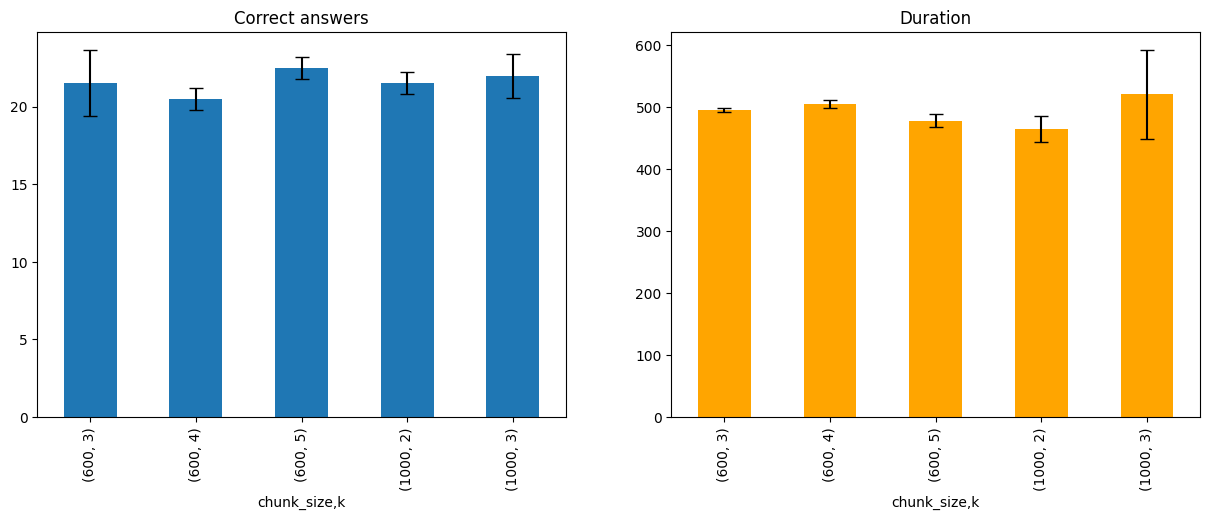

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Correct answers')
aggregated_df.plot.bar(y=('n_correct_answers', 'mean'), ax=ax[0], legend=False, yerr=aggregated_df[('n_correct_answers', 'std')], capsize=5)
ax[1].set_title('Duration')
aggregated_df.plot.bar(y=('duration', 'mean'), ax=ax[1], legend=False, yerr=aggregated_df[('duration', 'std')], capsize=5, color='orange')
plt.show()

In [12]:
COLOR_RED = '\033[91m'
COLOR_END = '\033[0m'
from scipy import stats
import pandas as pd

def compare_results(title, column, alpha=0.15):
    df_answer = pd.DataFrame(columns=['A', 'B', 't', 'p'])
    print(title)
    print(f'(alpha: {alpha})')
    print('----------------')
    index=df.index.unique()
    for i in range(len(index)):
        for j in range(i+1, len(index)):
            print(f'Comparing {index[i]} with {index[j]}')
            #performing a t-test to compare the means of the number of correct answers
            data_i=np.array(df.loc[index[i]][column], dtype=np.float64)
            data_j=np.array(df.loc[index[j]][column], dtype=np.float64)
            t, p = stats.ttest_ind(data_i, data_j)
            df_answer = pd.concat([df_answer, pd.DataFrame({
                'A': [index[i]],
                'B': [index[j]],
                't': [t],
                'p': [p]
                })], axis=0, ignore_index=True)
            #printing the results
            print(f't: {t}')
            print(f'p: {p}')
            if p < alpha:
                print(COLOR_RED + 'Both means are significantly different'+ COLOR_END)
            else:
                print('Both means are NOT significantly different')
    return df_answer

In [20]:
df_correct_answers = compare_results('Number of correct answers', 'n_correct_answers')
df_correct_answers[df_correct_answers['p'] < 0.15]
df_correct_answers.to_csv('correct_answers.csv')

Number of correct answers
(alpha: 0.15)
----------------
Comparing (1000, 2) with (1000, 3)
t: -0.4472135954999579
p: 0.6984886554222364
Both means are NOT significantly different
Comparing (1000, 2) with (600, 3)
t: 0.0
p: 1.0
Both means are NOT significantly different
Comparing (1000, 2) with (600, 4)
t: 1.414213562373095
p: 0.29289321881345254
Both means are NOT significantly different
Comparing (1000, 2) with (600, 5)
t: -1.414213562373095
p: 0.29289321881345254
Both means are NOT significantly different
Comparing (1000, 3) with (600, 3)
t: 0.2773500981126146
p: 0.8075499102701248
Both means are NOT significantly different
Comparing (1000, 3) with (600, 4)
t: 1.3416407864998738
p: 0.3117527983883147
Both means are NOT significantly different
Comparing (1000, 3) with (600, 5)
t: -0.4472135954999579
p: 0.6984886554222364
Both means are NOT significantly different
Comparing (600, 3) with (600, 4)
t: 0.6324555320336759
p: 0.5917517095361371
Both means are NOT significantly different
Co

C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_i=np.array(df.loc[index[i]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_j=np.array(df.loc[index[j]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_i=np.array(df.loc[index[i]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_j=np.array(df.loc[index[j]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_i=np.array(df.loc[index[i]][column], dtype=np

In [19]:
df_duration = compare_results('Duration', 'duration')
df_duration[df_duration['p'] < 0.15]
df_duration.to_csv('duration.csv')


Duration
(alpha: 0.15)
----------------
Comparing (1000, 2) with (1000, 3)
t: -1.063405773824101
p: 0.3990073743874334
Both means are NOT significantly different
Comparing (1000, 2) with (600, 3)
t: -2.021147564543154
p: 0.1806557807957852
Both means are NOT significantly different
Comparing (1000, 2) with (600, 4)
t: -2.6020363326107296
p: 0.1213844697811582
Both means are significantly different
Comparing (1000, 2) with (600, 5)
t: -0.8182870796515384
p: 0.4991783370690517
Both means are NOT significantly different
Comparing (1000, 3) with (600, 3)
t: 0.5022681479582572
p: 0.6653235958650525
Both means are NOT significantly different
Comparing (1000, 3) with (600, 4)
t: 0.3057983632387806
p: 0.7886523793167551
Both means are NOT significantly different
Comparing (1000, 3) with (600, 5)
t: 0.8261466621940177
p: 0.4955875408291497
Both means are NOT significantly different
Comparing (600, 3) with (600, 4)
t: -1.9628326084459324
p: 0.18865662751889253
Both means are NOT significantly di

C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_i=np.array(df.loc[index[i]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_j=np.array(df.loc[index[j]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_i=np.array(df.loc[index[i]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_j=np.array(df.loc[index[j]][column], dtype=np.float64)
C:\Users\vloba\AppData\Local\Temp\ipykernel_12464\2813515390.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  data_i=np.array(df.loc[index[i]][column], dtype=np